# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jovan Torio
- **Email:** m293b4ky2103@bangkit.academy
- **ID Dicoding:** jovan_torio_KXG7

## Menentukan Pertanyaan Bisnis

- Di musim apa jumlah penyewaan sepeda tertinggi?
- Bagaimana hubungan antara cuaca dengan jumlah penyewaan sepeda pada hari libur dan hari kerja?
- Bagaimana perubahan jumlah penyewaan sepeda antara pengguna terdaftar dan pengguna umum tergantung hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat data dari tabel *day*
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat data dari tabel *hour*
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari tabel `day` dan `hour` yang telah dikumpul dan dimuat, dapat disimpulkan bahwa kedua tabel memuat informasi tentang jumlah penyewaan sepeda oleh pengguna umum dan pengguna terdaftar pada jam dan tanggal tertentu.
- Setiap baris pada kedua tabel tersebut juga memuat informasi tentang berbagai kondisi seperti libur/tidaknya hari tersebut, musim, cuaca, suhu, kelembapan, dan kecepatan angin.
- Beberapa kolom memuat angka yang memiliki makna tertentu, contohnya adalah angka 0 pada kolom `yr` berarti 'tahun 2011'.

### Assessing Data

#### Menilai tabel `day_df`

In [4]:
# Menampilkan dan memeriksa tipe data dari tiap kolom dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Terdapat kesalahan tipe data pada kolom `dteday`, yang seharusnya berupa `datetime`.
- Jumlah data pada tabel `day_df` telah lengkap.

In [5]:
# Memeriksa duplikasi data dalam day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
# Memeriksa parameter statistik dari kolom numerik dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Tidak terdapat duplikasi dan keanehan nilai pada `day_df`

#### Menilai tabel `hour-df`

In [7]:
# Menampilkan dan memeriksa tipe data dari tiap kolom dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Terdapat kesalahan tipe data pada kolom `dteday`, yang seharusnya berupa `datetime`.
- Jumlah data pada tabel `hour_df` telah lengkap.

In [8]:
# Memeriksa duplikasi data dalam hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


- Tidak terdapat duplikasi dan keanehan nilai pada `hour_df`

In [9]:
# Memeriksa parameter statistik dari kolom numerik dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada kesalahan berupa ketidaklengkapan data, duplikasi data, maupun keanehan data. 
- Pada tabel `day_df` dan `hour_df`, terdapat kesalahan berupa tipe data kolom `dteday`, yang seharusnya berupa `datetime`.
- Beberapa kolom yang berisi angka dengan makna tertentu perlu diubah menjadi makna aslinya agar data lebih jelas. 

### Cleaning Data

#### Membersihkan Data `day_df`

Memperbaiki tipe data

In [10]:
# Mengubah tipe data kolom 'dteday' menjadi 'datetime'
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Mengubah tipe data kolom 'season' dan 'weathersit' menjadi 'category'
# Hal ini dilakukan untuk mengubah angka menjadi maknanya yang sesuai. 
categorical_features = ["season", "weathersit"]
for feature in categorical_features:
    day_df[feature] = day_df[feature].astype("category")

Mengonversi data

In [11]:
# Mengubah nilai dalam kolom 'season', 'weathersit', 'yr', 'mnth', 'holiday', dan 'workingday' menjadi nilai yang lebih mudah dibaca dan dipahami.
# Menggunakan map daripada replace dan inplace=True untuk menghindari FutureWarning.
day_df["season"] = day_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
day_df["weathersit"] = day_df["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light_RainSnow", 4: "Heavy_RainSnow"})
day_df["yr"] = day_df["yr"].map({0: 2011, 1: 2012})
day_df["mnth"] = day_df["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
day_df["holiday"] = day_df["holiday"].map({0: "No", 1: "Yes"})
day_df["workingday"] = day_df["workingday"].map({0: "No", 1: "Yes"})


Mengubah nama kolom

In [12]:
# Mengubah nama kolom agar lebih mudah dibaca dan dipahami.
day_df.rename(
    columns={
        "dteday": "date",
        "yr": "year",
        "mnth": "month",
        "workingday": "working_day",
        "weathersit": "weather",
        "temp": "temperature",
        "atemp": "feeling_temperature",
        "hum": "humidity",
        "windspeed": "wind_speed",
        "cnt": "total_users"
    },
    inplace=True
)

Mengulas perbaikan

In [13]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,working_day,weather,temperature,feeling_temperature,humidity,wind_speed,casual,registered,total_users
0,1,2011-01-01,Spring,2011,Jan,No,6,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,0,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Pengubahan nama kolom menjadi nama yang lebih mudah dipahami sukses dilakukan.
- Pengubahan nilai data pada kolom `season`, `year`, `month`, `holiday`, `working_day`, dan `weather` menjadi makna aslinya sukses dilakukan.

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   date                 731 non-null    datetime64[ns]
 2   season               731 non-null    category      
 3   year                 731 non-null    int64         
 4   month                731 non-null    object        
 5   holiday              731 non-null    object        
 6   weekday              731 non-null    int64         
 7   working_day          731 non-null    object        
 8   weather              731 non-null    category      
 9   temperature          731 non-null    float64       
 10  feeling_temperature  731 non-null    float64       
 11  humidity             731 non-null    float64       
 12  wind_speed           731 non-null    float64       
 13  casual               731 non-null  

- Pengubahan tipe data kolom `date` dari `object` menjadi `datetime` sukses dilakukan.
- Pengubahan tipe data kolom `season` dan `weather` menjadi `category` sukses dilakukan.

#### Membersihkan Data `hour_df`

Memperbaiki tipe data

In [15]:
# Mengubah tipe data kolom 'dteday' menjadi 'datetime'
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mengubah tipe data kolom 'season' dan 'weathersit' menjadi 'category'
# Hal ini dilakukan untuk mengubah angka menjadi maknanya yang sesuai. 
categorical_features = ["season", "weathersit"]
for feature in categorical_features:
    hour_df[feature] = hour_df[feature].astype("category")

Mengonversi data

In [16]:
# Mengubah nilai dalam kolom 'season', 'weathersit', 'yr', 'mnth', 'holiday', dan 'workingday' menjadi nilai yang lebih mudah dibaca dan dipahami.
# Menggunakan map daripada replace dan inplace=True untuk menghindari FutureWarning.
hour_df["season"] = hour_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
hour_df["weathersit"] = hour_df["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light_RainSnow", 4: "Heavy_RainSnow"})
hour_df["yr"] = hour_df["yr"].map({0: 2011, 1: 2012})
hour_df["mnth"] = hour_df["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
hour_df["holiday"] = hour_df["holiday"].map({0: "No", 1: "Yes"})
hour_df["workingday"] = hour_df["workingday"].map({0: "No", 1: "Yes"})


Mengubah nama kolom

In [17]:
# Mengubah nama kolom agar lebih mudah dibaca dan dipahami.
hour_df.rename(
    columns={
        "dteday": "date",
        "yr": "year",
        "mnth": "month",
        "hr": "hour",
        "workingday": "working_day",
        "weathersit": "weather",
        "temp": "temperature",
        "atemp": "feeling_temperature",
        "hum": "humidity",
        "windspeed": "wind_speed",
        "cnt": "total_users"
    },
    inplace=True
)

Mengulas perbaikan

In [18]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,working_day,weather,temperature,feeling_temperature,humidity,wind_speed,casual,registered,total_users
0,1,2011-01-01,Spring,2011,Jan,0,No,6,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,6,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,6,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,6,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,6,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


- Pengubahan nama kolom menjadi nama yang lebih mudah dipahami sukses dilakukan.
- Pengubahan nilai data pada kolom `season`, `year`, `month`, `hour`, `holiday`, `working_day`, dan `weather` menjadi makna aslinya sukses dilakukan.

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   date                 17379 non-null  datetime64[ns]
 2   season               17379 non-null  category      
 3   year                 17379 non-null  int64         
 4   month                17379 non-null  object        
 5   hour                 17379 non-null  int64         
 6   holiday              17379 non-null  object        
 7   weekday              17379 non-null  int64         
 8   working_day          17379 non-null  object        
 9   weather              17379 non-null  category      
 10  temperature          17379 non-null  float64       
 11  feeling_temperature  17379 non-null  float64       
 12  humidity             17379 non-null  float64       
 13  wind_speed           17379 non-

- Pengubahan tipe data kolom `date` dari `object` menjadi `datetime` sukses dilakukan.
- Pengubahan tipe data kolom `season` dan `weather` menjadi `category` sukses dilakukan.

**Insight:**
Pada proses Cleaning Data:
- Tipe data kolom `dteday` diubah menjadi `datetime`.
- Tipe data kolom `season` dan `weathersit` diubah menjadi `category`.
- Nilai data kolom `season`, `year`, `month`, `holiday`, `working_day`, dan `weather` diubah menjadi makna aslinya.
- Nama kolom `dteday`, `yr`, `mnth`, `hr`, `workingday`, `weathersit`, `temp`, `atemp`, `hum`, `windspeed`, dan `cnt` diubah agar lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [20]:
# Melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,working_day,weather,temperature,feeling_temperature,humidity,wind_speed,casual,registered,total_users
count,731.000000,731,731,731.000000,731,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jan,No,NaN,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi bahwa:
1. **Rata-rata** pengguna umum per hari sebanyak 848, dan rata-rata pengguna terdaftar sebanyak 3656, dengan jumlah total 4504 orang per hari.
2. **Standar deviasi** untuk pengguna umum per hari sebanyak 686, pengguna terdaftar sebanyak 1560, dan jumlah total 1937.

In [21]:
# Melihat jumlah penyewaan sepeda per tahun untuk pengguna umum, terdaftar, dan total
day_df.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
    "total_users": "sum"
})

,casual,registered,total_users
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


Berdasarkan tabel di atas, kita memperoleh informasi bahwa:
- Jumlah pengguna terdaftar **lebih banyak** daripada pengguna umum.
- Jumlah pengguna **meningkat** dari tahun 2011 ke 2012.

In [22]:
# Melihat jumlah penyewaan sepeda per musim
season_day_df = day_df.groupby(by="season", observed=False).agg({
    "total_users": "sum"
}).sort_values(by="total_users", ascending=False).reset_index()

season_day_df

,season,total_users
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Berdasarkan tabel di atas, kita memperoleh informasi bahwa: 
- Jumlah pengguna pada musim **Fall** (gugur) paling banyak. 

In [23]:
# Melihat jumlah penyewaan sepeda untuk hari kerja dan hari libur.
day_df.groupby(by="working_day").agg({
    "total_users": "sum"
}).sort_values(by="total_users", ascending=False)

,total_users
working_day,
Yes,2292410
No,1000269


Berdasarkan tabel di atas, kita memperoleh informasi bahwa: 
- Jumlah pengguna pada hari kerja lebih banyak daripada hari libur. 

In [24]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung jumlah penyewaan sepeda
weekday_grouped_df = day_df.groupby(by="weekday", observed=False).agg({
    "casual": "sum",
    "registered": "sum",
    "total_users": "sum"
}).reset_index()

# Mengubah nilai numerik hari menjadi nama hari
weekday_grouped_df['weekday'] = weekday_grouped_df['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
weekday_grouped_df

,weekday,casual,registered,total_users
0,Sun,140521,303506,444027
1,Mon,70784,384719,455503
2,Tue,57843,411266,469109
3,Wed,57319,415729,473048
4,Thu,61460,423935,485395
5,Fri,78238,409552,487790
6,Sat,153852,323955,477807


Berdasarkan tabel di atas, kita memperoleh informasi bahwa: 
- Jumlah pengguna umum tertinggi terjadi pada hari **Sabtu**.
- Jumlah pengguna terdaftar tertinggi terjadi pada hari **Kamis**.
- Jumlah pengguna total tertinggi terjadi pada hari **Juma**t.

### Explore `hour_df`

In [25]:
# Melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,working_day,weather,temperature,feeling_temperature,humidity,wind_speed,casual,registered,total_users
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jul,NaN,No,NaN,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,6.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi bahwa:
1. **Rata-rata** pengguna umum per jam sebanyak 35, dan rata-rata pengguna terdaftar sebanyak 153, dengan jumlah total 189 orang per jam.
2. **Standar deviasi** untuk pengguna umum per jam sebanyak 49, pengguna terdaftar sebanyak 151, dan jumlah total 181.

In [26]:
# Memisahkan data berdasarkan hari kerja dan hari libur
working_day_df = hour_df[hour_df["working_day"] == "Yes"]
holiday_df = hour_df[hour_df["working_day"] == "No"]

# Menghitung jumlah penyewaan sepeda berdasarkan cuaca untuk hari kerja dan hari libur
weather_working_day_total = working_day_df.groupby("weather", observed=False)["total_users"].sum().reset_index()
weather_holiday_total = holiday_df.groupby("weather", observed=False)["total_users"].sum().reset_index()

# Menambahkan kolom 'Day Type' untuk membedakan antara hari kerja dan hari libur
weather_working_day_total["Day Type"] = "Working Day"
weather_holiday_total["Day Type"] = "Holiday"

# Menggabungkan data hari kerja dan hari libur
combined_df = pd.concat([weather_working_day_total, weather_holiday_total])
combined_df

,weather,total_users,Day Type
0,Clear,1590954,Working Day
1,Mist,583970,Working Day
2,Light_RainSnow,117286,Working Day
3,Heavy_RainSnow,200,Working Day
0,Clear,747219,Holiday
1,Mist,211982,Holiday
2,Light_RainSnow,41045,Holiday
3,Heavy_RainSnow,23,Holiday


Berdasarkan tabel di atas, kita memperoleh informasi bahwa:
- Jumlah pengguna pada cuaca cerah (Clear) saat hari kerja paling banyak.
- Jumlah pengguna pada cuaca hujan/salju lebat (Heavy_RainSnow) saat hari libur paling sedikit.

**Insight:**
- Pengguna terdaftar **lebih banyak** daripada pengguna umum.
- Jumlah pengguna **meningkat** dari tahun 2011 ke 2012.
- Jumlah pengguna paling tinggi tercatat pada musim **Fall** (musim gugur), **hari kerja**, atau saat **cuaca cerah**.
- Jumlah pengguna umum tertinggi terjadi pada hari **Sabtu**, pengguna terdaftar tertinggi pada hari **Kamis**, dan pengguna total tertinggi pada hari **Jumat**.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di musim apa jumlah penyewaan sepeda tertinggi?

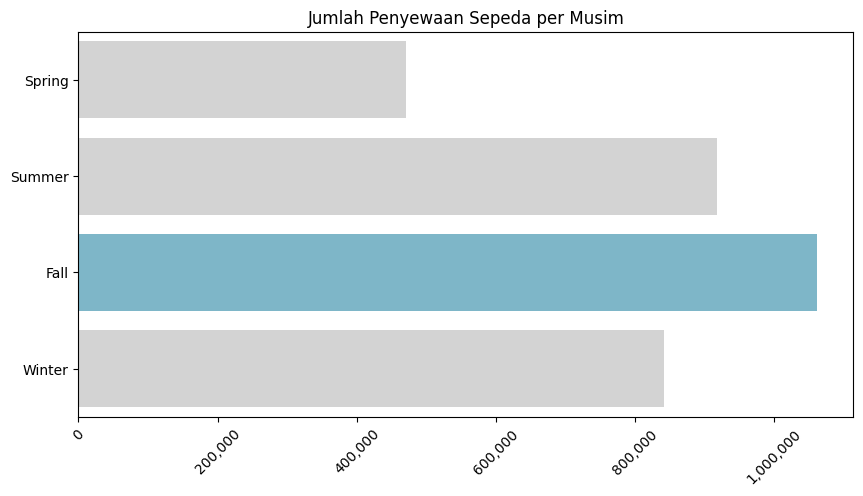

In [27]:
color = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

# Membuat figure untuk plot
plt.figure(figsize=(10, 5))

# Membuat plot bar untuk jumlah penyewaan sepeda per musim
sns.barplot(
    y="season",
    x="total_users", 
    hue="season", 
    data=season_day_df,
    palette=color, 
    legend=False)

plt.title("Jumlah Penyewaan Sepeda per Musim")
plt.xlabel(None)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(None)
plt.show()

Berdasarkan visualisasi data, jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall) dengan total 1.061.129 penyewaan.

### Pertanyaan 2: Bagaimana hubungan cuaca dengan jumlah penyewaan sepeda pada hari libur dan hari kerja?

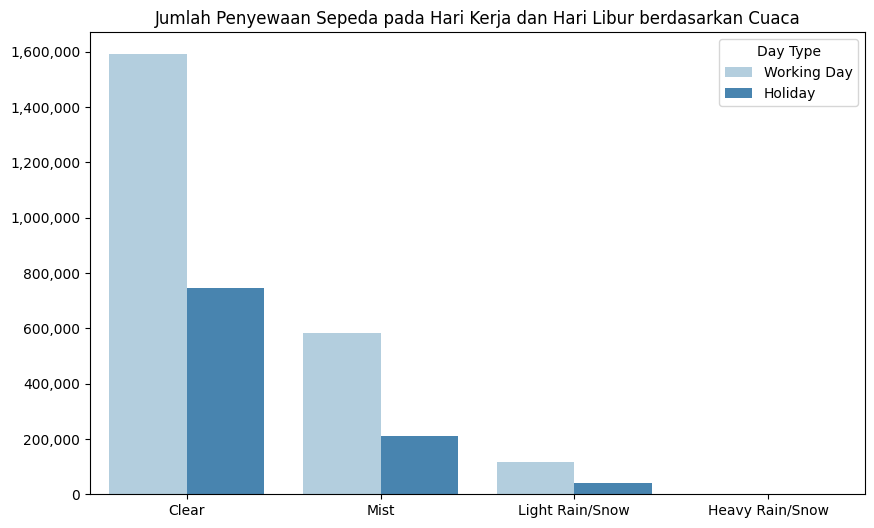

In [28]:
# Membuat plot bar untuk jumlah penyewaan sepeda berdasarkan cuaca dan jenis hari
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='weather', y='total_users', hue='Day Type', data=combined_df, palette='Blues')

plt.title('Jumlah Penyewaan Sepeda pada Hari Kerja dan Hari Libur berdasarkan Cuaca')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


Berdasarkan visualisasi data, dapat dilihat bahwa semakin baik cuaca, semakin tinggi jumlah penyewaan sepeda, baik pada hari kerja maupun hari libur. Penyewaan tertinggi terjadi pada hari kerja dengan cuaca cerah (Clear), yaitu sebanyak 1.590.954 orang.

### Pertanyaan 3: Bagaimana perubahan jumlah penyewaan sepeda antara pengguna terdaftar dan pengguna umum tergantung hari?

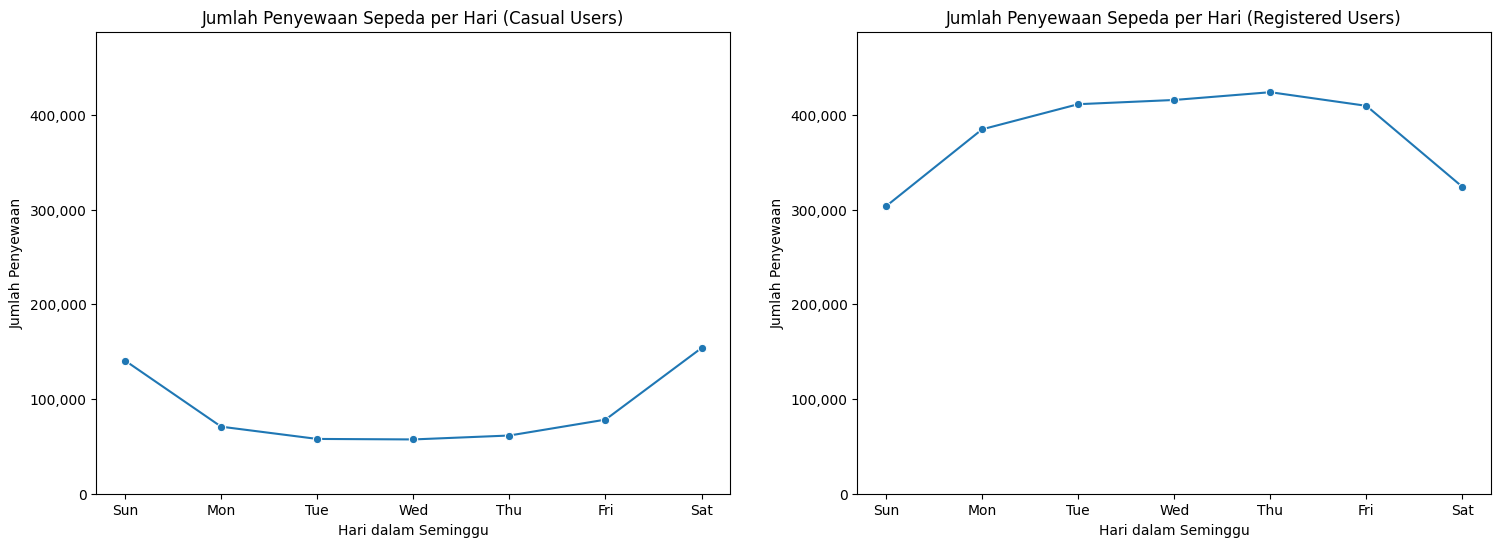

In [29]:
# Membuat figure dan axis untuk plot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Membuat plot garis untuk jumlah penyewaan sepeda oleh pengguna umum per hari
sns.lineplot(data=weekday_grouped_df, x='weekday', y='casual', marker='o', ax=ax[0])
ax[0].set_title('Jumlah Penyewaan Sepeda per Hari (Casual Users)')
ax[0].set_xlabel('Hari dalam Seminggu')
ax[0].set_ylabel('Jumlah Penyewaan')
ax[0].set_ylim(0, weekday_grouped_df['total_users'].max()+1)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Membuat plot garis untuk jumlah penyewaan sepeda oleh pengguna terdaftar per hari
sns.lineplot(data=weekday_grouped_df, x='weekday', y='registered', marker='o', ax=ax[1])
ax[1].set_title('Jumlah Penyewaan Sepeda per Hari (Registered Users)')
ax[1].set_xlabel('Hari dalam Seminggu')
ax[1].set_ylabel('Jumlah Penyewaan')
ax[1].set_ylim(0, weekday_grouped_df['total_users'].max())
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

Berdasarkan visualisasi data tersebut, diketahui bahwa jumlah penyewaan sepeda oleh pengguna umum menurun jika hari beralih dari akhir pekan (Sabtu dan Minggu) ke hari kerja (Senin hingga Jumat), sedangkan jumlah penyewaan oleh pengguna terdaftar meningkat.

**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall).

- Semakin baik cuaca, semakin tinggi jumlah penyewaan sepeda, baik pada hari kerja maupun hari libur.

- Jumlah penyewaan sepeda oleh pengguna umum lebih tinggi pada akhir pekan (Sabtu dan Minggu) dibandingkan hari kerja. Sebaliknya, jumlah penyewaan oleh pengguna terdaftar lebih tinggi pada hari kerja (Senin hingga Jumat).

## Conclusion

- Conclusion pertanyaan 1: **Di musim apa jumlah penyewaan sepeda tertinggi?** <br>
Berdasarkan analisis data, jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (Fall), dengan total penyewaan sebanyak 1,061,129 orang. Kesimpulan yang dapat ditarik dari informasi ini adalah bahwa musim gugur adalah musim yang paling banyak diminati oleh pengguna sepeda.

- Conclusion pertanyaan 2: **Bagaimana hubungan cuaca dengan jumlah penyewaan sepeda pada hari libur dan hari kerja?** <br>
Jumlah penyewaan sepeda tertinggi terjadi pada hari kerja dengan cuaca cerah (Clear), dengan total penyewaan sebanyak 1.590.954 orang. Kesimpulan yang dapat ditarik dari informasi ini adalah semakin baik cuaca, semakin tinggi jumlah penyewaan sepeda, baik pada hari kerja maupun hari libur.

- Conclusion pertanyaan 3: **Bagaimana perubahan jumlah penyewaan sepeda antara pengguna terdaftar dan pengguna umum tergantung hari?** <br>
Jumlah penyewaan sepeda oleh pengguna umum lebih tinggi pada akhir pekan (Sabtu dan Minggu) dibandingkan hari kerja. Sebaliknya, jumlah penyewaan oleh pengguna terdaftar lebih tinggi pada hari kerja (Senin hingga Jumat). Kesimpulan yang dapat ditarik dari informasi ini adalah bahwa pengguna umum lebih banyak menyewa sepeda untuk rekreasi pada akhir pekan, sementara pengguna terdaftar lebih banyak menggunakan sepeda sebagai alat transportasi sehari-hari pada hari kerja.

## Analisis Lanjutan

### Analisis Clustering: Manual Grouping

Analisis Clustering dengan metode Manual Grouping akan diterapkan untuk menjawab pertanyaan bisnis berikut: <br>
**Pada jangka waktu apa jumlah penyewaan sepeda paling banyak?**

Tujuan dari analisis ini adalah untuk mengkategorikan data penyewaan sepeda per jam dari dataset `hour.csv` ke dalam beberapa kurun waktu tertentu. Dengan demikian, kita dapat menganalisis dan memprediksi perilaku pengguna sepeda pada berbagai jam dalam sehari.

In [30]:
# Fungsi untuk mengelompokkan jam ke dalam label waktu tertentu
def time_label(hour):
    if 5 <= hour < 7 or 9 <= hour < 12:
        return "Pagi"
    elif 7 <= hour < 9:
        return "Sibuk Pagi"
    elif 12 <= hour < 15:
        return "Siang"
    elif 15 <= hour < 17:
        return "Sore"
    elif 17 <= hour < 19:
        return "Sibuk Sore"
    else:
        return "Malam"

In [31]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Menambahkan kolom 'time_label' ke dalam dataframe hour_df
hour_df["time_label"] = hour_df["hour"].apply(lambda x: time_label(x))

# Mengelompokkan data berdasarkan 'time_label' dan menghitung jumlah penyewaan sepeda
time_label_grouped_df = hour_df.groupby("time_label").agg({
    "total_users": "sum"
}).sort_values(by="total_users", ascending=False).reset_index()

time_label_grouped_df

,time_label,total_users
0,Malam,768585
1,Sibuk Sore,646632
2,Siang,544985
3,Pagi,506408
4,Sibuk Pagi,415172
5,Sore,410897


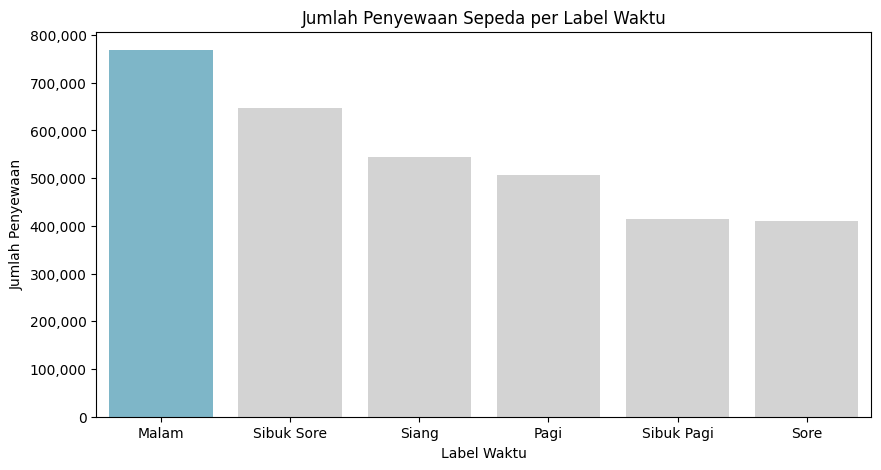

In [32]:

# Membuat plot bar untuk jumlah penyewaan sepeda per label waktu
plt.figure(figsize=(10, 5))

sns.barplot(
    x="time_label",
    y="total_users",
    hue="time_label",
    data=time_label_grouped_df,
    palette=colors
)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Jumlah Penyewaan Sepeda per Label Waktu")
plt.xlabel("Label Waktu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Dari analisis tersebut, dapat diketahui bahwa penyewaan sepeda paling banyak terjadi pada periode "Malam" (pukul 19.00-05.00). Hal ini kemungkinan disebabkan oleh banyaknya aktivitas yang dilakukan pada jangka waktu tersebut, serta kondisi lingkungan yang lebih sejuk pada malam hari.

### Analisis Clustering: Binning
Analisis Clustering dengan metode Binning akan diterapkan untuk menjawab pertanyaan bisnis berikut: <br>
**Pada range suhu apa jumlah penyewaan sepeda paling banyak?**

Tujuan dari analisis ini adalah untuk mengelompokkan data penyewaan sepeda dari dataset `hour.csv` ke dalam beberapa rentang suhu tertentu. Dengan demikian, kita dapat menganalisis dan memprediksi perilaku pengguna sepeda berdasarkan suhu pada berbagai suhu.

In [33]:
# Menghitung suhu sebenarnya dengan mengalikan kolom 'temperature' dengan 41
hour_df["temperature_real"] = hour_df["temperature"] * 41

# Membuat bin untuk rentang suhu dengan 5 bin dan presisi 1 desimal
temperature_bins = pd.cut(hour_df["temperature_real"], bins=5, precision=1)

# Mengubah label bin menjadi rentang suhu yang lebih mudah dibaca
temperature_bins = temperature_bins.apply(lambda x: f"{x.left:.1f}-{x.right:.1f}")
hour_df["temperature_bins"] = temperature_bins

# Mengelompokkan data berdasarkan 'temperature_bins' dan menghitung jumlah penyewaan sepeda
temperature_bin_df = hour_df.groupby("temperature_bins", observed=False).agg({
    "total_users": "sum"
}).reset_index()

temperature_bin_df

,temperature_bins,total_users
0,0.8-8.9,69624
1,8.9-16.9,659269
2,16.9-24.9,996132
3,24.9-33.0,1336324
4,33.0-41.0,231330


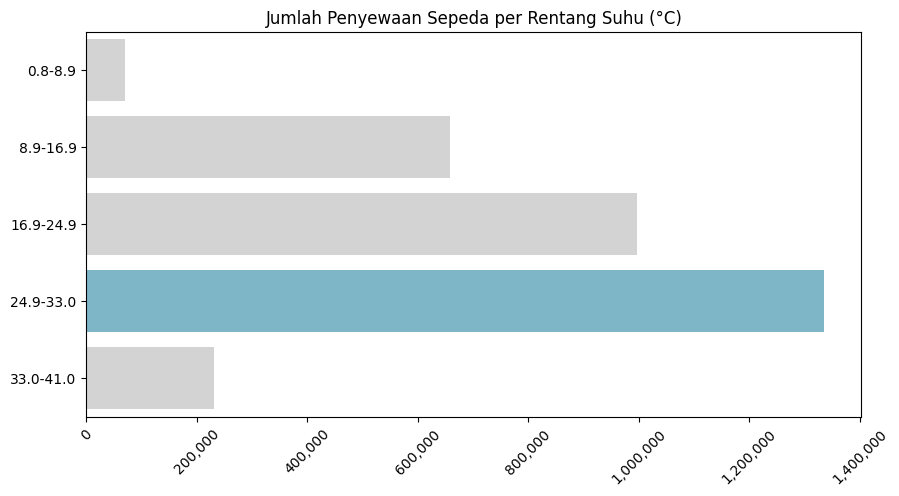

In [34]:

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

# Membuat plot bar untuk jumlah penyewaan sepeda per rentang suhu
plt.figure(figsize=(10, 5))
sns.barplot(y="temperature_bins", x="total_users", hue="temperature_bins", data=temperature_bin_df, palette=colors)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Jumlah Penyewaan Sepeda per Rentang Suhu (°C)")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()